# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [68]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [69]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()
print('X,y:')
print(X)


X,y:
[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]


# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [70]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [71]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

loss: 1.2848224717239367
Difference between your loss and correct loss:
0.01896541960606335


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [72]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

loss: 1.2848224717239367
loss: 1.2848224717239367
loss: 1.2848214150269732
loss: 1.284823528430293
loss: 1.2848224917342972
loss: 1.2848224517185762
loss: 1.284820367642202
loss: 1.284824575872559
loss: 1.2848242395537384
loss: 1.2848207039160215
loss: 1.2848239836717164
loss: 1.284820959794614
loss: 1.2848224228625427
loss: 1.2848225205903308
loss: 1.2848225192308576
loss: 1.2848224242220159
loss: 1.2848225061828276
loss: 1.2848224372702375
loss: 1.2848221758707417
loss: 1.2848227675944783
loss: 1.284822394425826
loss: 1.2848225490462362
loss: 1.2848229101195778
loss: 1.2848220333339189
loss: 1.284822544440112
loss: 1.2848223990127614
loss: 1.28482938887241
loss: 1.2848155546661397
loss: 1.2848195794913244
loss: 1.2848253639853675
loss: 1.2848197796728034
loss: 1.2848251637989023
loss: 1.2848224884101531
loss: 1.2848224550427203
loss: 1.2848225464303904
loss: 1.284822397022483
loss: 1.2848226754224144
loss: 1.2848222680354167
loss: 1.2848218014085349
loss: 1.2848231421172989
loss: 1.2

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

loss: 1.2419919059496058
loss: 0.9111895048202695
loss: 0.7279675674105989
loss: 0.5879293122180258
loss: 0.4433967459543875
loss: 0.32122966542541986
loss: 0.22957298913728288
loss: 0.19195332513305627
loss: 0.1426491268037209
loss: 0.12272636325475239
loss: 0.09296065920635965
loss: 0.0779404245872491
loss: 0.07262072448523942
loss: 0.06535573586282978
loss: 0.05461542007388594
loss: 0.045517830818876795
loss: 0.04701316495090241
loss: 0.04297751078827696
loss: 0.03699840899237131
loss: 0.03612153549272154
loss: 0.03605002894896775
loss: 0.03293765061875727
loss: 0.03005545940756799
loss: 0.03158963937781642
loss: 0.028283033075827815
loss: 0.02920994366090314
loss: 0.0242695287426846
loss: 0.026356102364579442
loss: 0.025843432684511478
loss: 0.024542545300299836
loss: 0.023286125856647893
loss: 0.02127685430737926
loss: 0.02199817286731652
loss: 0.021935251899825717
loss: 0.021805446510956825
loss: 0.021381155705552546
loss: 0.02105429793319321
loss: 0.020365056635610453
loss: 0.02

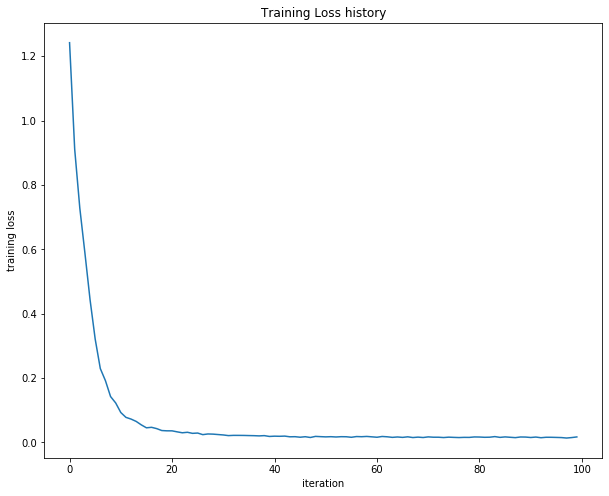

In [73]:
net = init_toy_model()

# print('X: ',X)

stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('stats: ',stats)
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [74]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [75]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


loss: 2.3027619364181766
iteration 0 / 1000: loss 2.302762
loss: 2.3027819625557
loss: 2.3027623698626285
loss: 2.3027820713945104
loss: 2.302773335968573
loss: 2.30277085118626
loss: 2.3027624013841446
loss: 2.302769275144858
loss: 2.302764080658935
loss: 2.3027605771943684
loss: 2.302774525788192
loss: 2.302769217667251
loss: 2.302761654415228
loss: 2.302770001753098
loss: 2.302759331250076
loss: 2.302752308670598
loss: 2.302782602301465
loss: 2.302759100218688
loss: 2.3027544953120773
loss: 2.3027678990982254
loss: 2.302744771557405
loss: 2.3027506299527394
loss: 2.302724328195787
loss: 2.302742091438121
loss: 2.302739754122859
loss: 2.302729116765756
loss: 2.302743109699825
loss: 2.3027239937941393
loss: 2.3027493633243656
loss: 2.3027082624722697
loss: 2.302721212718814
loss: 2.3027299986421723
loss: 2.302693296082514
loss: 2.302720794100216
loss: 2.3027126250840233
loss: 2.3027195100034796
loss: 2.3027184236080633
loss: 2.3027140373760013
loss: 2.302690417082912
loss: 2.302680180

loss: 2.2532975000353312
loss: 2.238031336931588
loss: 2.2350680597008856
loss: 2.2399168217371357
loss: 2.2715635350450065
loss: 2.2278125244778346
loss: 2.2383552092324317
loss: 2.232172467488211
loss: 2.2449122897753493
loss: 2.225381398920352
loss: 2.242840412577267
loss: 2.262526379550253
loss: 2.2286626149391084
loss: 2.228489350929237
loss: 2.246149007531157
loss: 2.248722997425269
loss: 2.2139721398056347
loss: 2.2242159350751347
loss: 2.2159967659461737
loss: 2.197077807054586
loss: 2.2208911465980608
loss: 2.2454009383572915
loss: 2.226136533104375
loss: 2.2273056424008093
loss: 2.1885902777183164
loss: 2.194711801681702
loss: 2.1946780768153884
loss: 2.244899185845268
loss: 2.1855031975678942
loss: 2.19749376997889
loss: 2.272585566346831
loss: 2.2389125818185405
loss: 2.205155572417238
loss: 2.243344457895049
loss: 2.1980107137153744
loss: 2.1923087988430496
loss: 2.218499099520097
loss: 2.211601045010908
loss: 2.198762723251749
loss: 2.2360094917952096
loss: 2.240074841583

loss: 2.0936104544542666
loss: 2.0741341339142667
loss: 2.032359209194212
loss: 2.049842792866254
loss: 1.9358919885794186
loss: 2.0423371161551986
loss: 2.0748055231659444
loss: 2.087340870469424
loss: 1.9683814143258107
loss: 1.996581680794684
loss: 2.0946442131044622
loss: 2.0223047458338645
loss: 2.0748586451266102
loss: 2.063796058812197
loss: 2.0690972508228263
loss: 2.0518595701023226
loss: 2.0291257582326794
loss: 2.032914179146653
loss: 2.0634559828237964
loss: 2.0055568764045817
loss: 1.9642439781590897
loss: 2.0425486089934863
loss: 1.9914493416109456
loss: 2.0439283221090765
loss: 2.042189193525061
loss: 2.077915467278018
loss: 2.000991619278414
loss: 2.070033198235951
loss: 2.036913804264669
loss: 2.088385745865303
loss: 2.0378408255271414
loss: 2.0151491062166897
loss: 2.0421043261179994
loss: 2.031659050155636
loss: 2.0486234148006877
loss: 1.987018648814575
loss: 2.0132267529672916
loss: 2.0743355083138204
loss: 1.9920624630623234
loss: 2.0298850956566032
loss: 2.025192

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

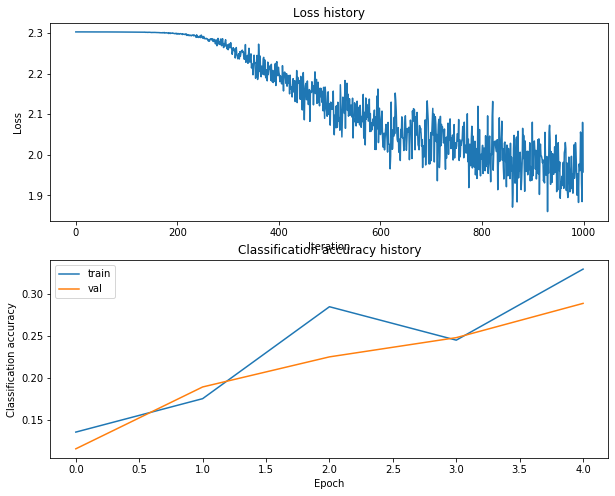

In [76]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

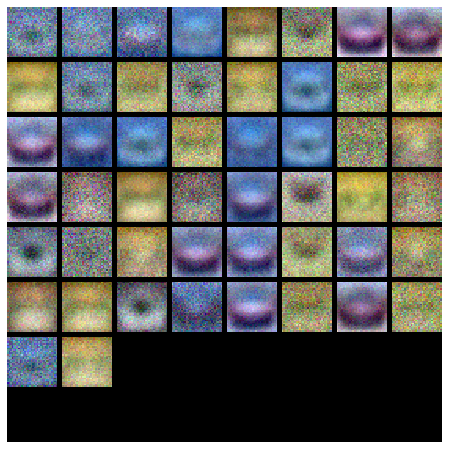

In [77]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [ ]:
best_net = None # store the best model into this 
best_valacc=-1.0
input_size = 32 * 32 * 3
num_classes = 10
#hidden_size = 50
hidden_size = 32 * 32 * 3
learn_rate =[7.2e-4]
#learning_rate_decay=[0.94,0.95,0.93]
reg=[1e-3]
results = {}
params = [x1 for x1 in learn_rate ]
#          for x3 in learning_rate_decay for x4 in reg]
for learn_rate in params:
    net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=6400, batch_size=128,
            learning_rate=7.2e-4, learning_rate_decay=0.95,
            reg=1e-3, verbose=True)

# Predict on the validation set
    val_acc = np.mean(net.predict(X_val) == y_val)
    results[learn_rate] =val_acc 
    if val_acc>best_valacc:
        best_valacc = val_acc
        best_net = net


for learn_rate in sorted(results):
    val_accuracy = results[(learn_rate)]
    print ('learn_rate ' ,learn_rate)
    print ('val accuracy' , val_accuracy)
print ('best validation accuracy achieved during cross-validation: %f' % best_valacc)


#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

pass

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


loss: 2.3025608708234797
iteration 0 / 6400: loss 2.302561
loss: 2.3014209167847675
loss: 2.301290364985206
loss: 2.2998758358309677
loss: 2.299065785031619
loss: 2.2982342857274425
loss: 2.297225296552274
loss: 2.2939108751853095
loss: 2.295181602989773
loss: 2.293347257459512
loss: 2.29152143417934
loss: 2.2891522906052577
loss: 2.2843645712474565
loss: 2.2813626222489227
loss: 2.2809924797541865
loss: 2.286216406863481
loss: 2.277171575314216
loss: 2.2712161063570298
loss: 2.2718641969897786
loss: 2.2564970137649696
loss: 2.25381921226323
loss: 2.2482409259924667
loss: 2.2465005936891416
loss: 2.223723942942566
loss: 2.2425869380488295
loss: 2.2134748716003565
loss: 2.231056947503697
loss: 2.205483960521609
loss: 2.191630078522344
loss: 2.180653075363097
loss: 2.1817556340577866
loss: 2.1663399597442403
loss: 2.1754747891092463
loss: 2.1757493960349987
loss: 2.1398222737253794
loss: 2.1707071899922687
loss: 2.143039603512752
loss: 2.1156963009663485
loss: 2.179832179712931
loss: 2.1

loss: 1.6174257298084815
loss: 1.7217820647136717
loss: 1.7002964733496717
loss: 1.5280459797786516
loss: 1.6777143181114054
loss: 1.6820238182863956
loss: 1.6798330685554406
loss: 1.7437621442218014
loss: 1.5753087309433462
loss: 1.7420614803122312
loss: 1.539426634925326
loss: 1.597632161528314
loss: 1.4889502000242243
loss: 1.723456275623442
loss: 1.6164474771326292
loss: 1.5981112962814652
loss: 1.6781733032438308
loss: 1.5973864057456668
loss: 1.581680606719038
loss: 1.5788422228527812
loss: 1.541027128433637
loss: 1.62830006274318
loss: 1.5061042592405973
loss: 1.6363955223600242
loss: 1.5347781483476048
loss: 1.658264465284638
loss: 1.569345664805272
loss: 1.7036556068072977
loss: 1.6973617801872036
loss: 1.6446568162359583
loss: 1.6181732697003237
loss: 1.7501363026234151
loss: 1.7153693957066527
loss: 1.5545905385575463
loss: 1.7994534553255697
loss: 1.6813326716938457
loss: 1.5045141383623923
loss: 1.839155890470172
loss: 1.5955255005476177
loss: 1.6311103923028984
loss: 1.78

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

